In [1]:
#using Pkg
#Pkg.add("Symbolics")
using Symbolics
using Plots

In [2]:
function derivate(f, x, h)
    return( (f(x+h) - f(x) )/h ) 
end

function three_point_numeric_diff_middle(f, x, h)
    """
        Three point numeric differenciation using the middle given a function f,
        a point x and an h.

        Parameters
        ----------
        f : Function
            Function to be evaluated.
        x : Float64
            Point to be evaluated.
        h : Float64
            h to be used in the numeric differenciation.
        
        Returns
        -------
        Float64
            Numeric differenciation of f at x using h.
    """
    xs = [x+h, x-h]
    coefficients = [1, -1]
    denominator = 2*h

    return sum([cx[1]*f(cx[2]) for cx  in zip(coefficients, xs)])/denominator
end

function three_point_numeric_diff_extremes(f::Function, x::Float64, epsilon::Float64, is_right_extreme::Bool = true)::Float64
    """
        Three point numeric differenciation using the extremes given a function f,
        a point x and an epsilon.

        Parameters
        ----------
        f : Function
            Function to be evaluated.
        x : Float64
            Point to be evaluated.
        epsilon : Float64
            Epsilon to be used in the numeric differenciation.
        
        Returns
        -------
        Float64
            Numeric differenciation of f at x using epsilon.
    """

    if is_right_extreme
        coefficients = [1, -4, 3]
        xs = [x - 2*epsilon, x - epsilon, x]
    else
        coefficients = [-3, 4, -1]
        xs = [x, x + epsilon, x + 2*epsilon]
    end 

    denominator = (2*epsilon)

    return sum([cx[1]*f(cx[2]) for cx  in zip(coefficients, xs)])/denominator
end

function three_point_numeric_diff_extremes(points::Vector{Vector{Float64}}, epsilon::Float64, is_right_extreme::Bool = true)::Float64
    """
        Three point numeric differenciation using the extremes given a set of points [[x, y], ...]
        and an epsilon.

        Parameters
        ----------
        points : Array{Float64, 1}
            Set of points to be evaluated.
        epsilon : Float64
            Epsilon to be used in the numeric differenciation.
        
        Returns
        -------
        Float64
            Numeric differenciation of f at x using epsilon.
    """
    if length(points) != 3
        error("The length of the points array must be 3")
    end

    if is_right_extreme
        coefficients = [1, -4, 3]
    else
        coefficients = [-3, 4, -1]
    end
    ys = [points[1][2], points[2][2], points[3][2]]
    denominator = (2*epsilon)

    return sum([cx[1]*cx[2] for cx  in zip(coefficients, ys)])/denominator
end


three_point_numeric_diff_extremes (generic function with 4 methods)

In [3]:
function five_point_numeric_diff_middle(f, x, h)
    xs = [(x + i*h) for i in -2:1:2]
    coefficients = [1, -8, 0, 8, -1]
    denominator = 12*h
    
    return sum([cx[1]*f(cx[2]) for cx  in zip(coefficients, xs)])/denominator
end

function five_point_numeric_diff_extremes(f::Function, x::Float64, epsilon::Float64, is_right_extreme::Bool = true)::Float64
    """
        Five point numeric differenciation using the extremes given a function f,
        a point x and an epsilon.

        Parameters
        ----------
        f : Function
            Function to be evaluated.
        x : Float64
            Point to be evaluated.
        epsilon : Float64
            Epsilon to be used in the numeric differenciation.
        
        Returns
        -------
        Float64
            Numeric differenciation of f at x using epsilon.
    """

    if is_right_extreme
        xs = [(x - i*epsilon) for i in 0:1:4]
        coefficients = [3, -16, 36, -48, 25]
    else
        xs = [(x + i*epsilon) for i in 0:1:4]
        coefficients = [-25, 48, -36, 16, -3]
    end


    denominator = 12*epsilon
    
    return sum([cx[1]*f(cx[2]) for cx  in zip(coefficients, xs)])/denominator
end

function five_point_numeric_diff_extremes(points::Vector{Vector{Float64}}, epsilon::Float64, is_right_extreme::Bool = true)::Float64
    """
        Five point numeric differenciation using the extremes given a set of points [[x, y], ...]
        and an epsilon.

        Parameters
        ----------
        points : Array{Float64, 1}
            Set of points to be evaluated.
        epsilon : Float64
            Epsilon to be used in the numeric differenciation.
        
        Returns
        -------
        Float64
            Numeric differenciation of f at x using epsilon.
    """
    if length(points) != 5
        error("The length of the points array must be 5")
    end

    if is_right_extreme
        coefficients = [3, -16, 36, -48, 25]
    else
        coefficients = [-25, 48, -36, 16, -3]
    end 

    ys = [points[1][2], points[2][2], points[3][2], points[4][2], points[5][2]]
    denominator = 12*epsilon
    
    return sum([cx[1]*cx[2] for cx  in zip(coefficients, ys)])/denominator
end


five_point_numeric_diff_extremes (generic function with 4 methods)

In [4]:
function richardson(f, x, h, n)
    if n == 1
        return derivate(f, x, h)
    end

    term1 = richardson(f, x, h/2, n-1)
    term2 = (term1 - richardson(f, x, h, n-1))/(4^(n-1) - 1)

    return  term1 + term2
end

richardson (generic function with 1 method)

![Alt text](image-4.png)

In [5]:
function f1(x)
    return tan(x/3)
end

function f2(x)
    return eps(x) + x
end

f2 (generic function with 1 method)

Derivate both functions using three and five points formula, with middle point cause is more accuracy

In [6]:
x1 = 3.0
x2 = 2.0
h1 = 0.1
h2 = 0.2


# First function
df1_3 = three_point_numeric_diff_middle(f1, x1, h1)
df1_5 = five_point_numeric_diff_middle(f1, x1, h1)

# Second function
df2_3 = three_point_numeric_diff_middle(f2, x2, h2)
df2_5 = five_point_numeric_diff_middle(f2, x2, h2)

# print results
println("First function")
println("3 point numeric diff: ", df1_3)
println("5 point numeric diff: ", df1_5)
println("") 
println("Second function")
println("3 point numeric diff: ", df2_3)
println("5 point numeric diff: ", df2_5)

First function
3 point numeric diff: 1.1453517333306606


5 point numeric diff: 1.1417911815759805

Second function
3 point numeric diff: 1.0000000000000009
5 point numeric diff: 1.0000000000000007


Now we go to calculate the first dervate of $y = cos(x)$

In [7]:
function f(x)
    return cos(x)
end

f (generic function with 1 method)

In [8]:
h1 = pi/3
h2 = pi/6
x = pi/4

approx1 = richardson(f, x, h1, 5)
approx2 = richardson(f, x, h2, 5)
println("\n===========Richardson extrapolation =======")
println("Approximation h1: ", approx1)
println("Approximation h2: ", approx2)

# three and five points method

println("\n===========Three points method =======")
df_3_1 = three_point_numeric_diff_middle(f, x, h1)
df_3_2 = three_point_numeric_diff_middle(f, x, h1)
println("Approximation h1: ", df_3_1)
println("Approximation h2: ", df_3_2)

println("\n===========Five points method =======")
df_5_1 = five_point_numeric_diff_middle(f, x, h2)
df_5_2 = five_point_numeric_diff_middle(f, x, h2)
println("Approximation h1: ", df_5_1)
println("Approximation h2: ", df_5_2)


===========Richardson extrapolation =======
Approximation h1: -0.7212259854577441
Approximation h2: -0.7141644765941705

===========Three points method =======


Approximation h1: -0.5847726009252571
Approximation h2: -0.5847726009252571

===========Five points method =======


Approximation h1: -0.7053921158486868
Approximation h2: -0.7053921158486868


![Alt text](image-5.png)

In [9]:
function normal_distribution(x)
    return (1/sqrt(2*pi))*exp(-x^2/2)
end

normal_distribution (generic function with 1 method)

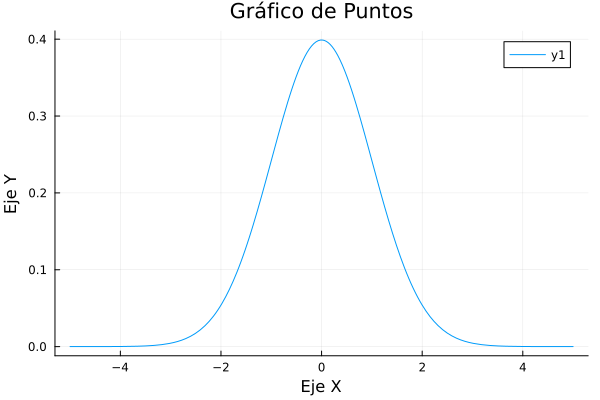

In [10]:
# Graficar puntos utilizando scatter() 
plot(normal_distribution, legend=true, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")

First step is obtain n points to use cubic splines

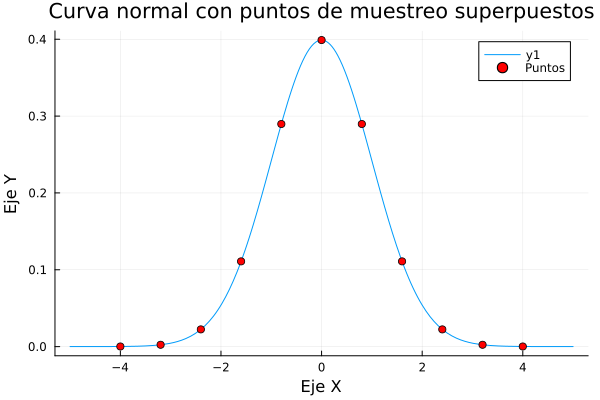

In [11]:
step = 0.8
start = -4
stop = 4

x_sample = [i for i in start:step:stop]
y_sample = [normal_distribution(x) for x in x_sample]
sampled_points = [[x, y] for (x, y) in zip(x_sample, y_sample)]


plot(normal_distribution, title="Curva normal con puntos de muestreo superpuestos", xlabel="Eje X", ylabel="Eje Y", legend=true)
scatter!(x_sample, y_sample, label="Puntos", color=:red)   

Now get the derivative and interpolate it with lagrange polynomials.

In [12]:
function lagrange_coefficients(xvalue::Float64, x::Vector, k::Int)::Float64

    """
        Calculates the lagrange coefficients for the lagrange polynomial interpolation.

        Parameters
        ----------
            xvalue: point to interpolate.
            x: list of points [x, y] to interpolate.
            k: index of the point to interpolate.
        
        Returns
        -------
            y: interpolated value.
    """

    n = length(x)
    numerator = 1
    denominator = 1

    for j = 1:n
        if j != k
            numerator = numerator * (xvalue - x[j])
            denominator = denominator * (x[k] - x[j])
        end
    end

    return numerator / denominator
end

function lagrange_polynomial(points::Vector{Vector{Float64}}, x::Float64)
    """
        Polynomial Interpolation, with lagrange polynomials.

        Parameters
        ----------
            points: list of points [x, y] to interpolate.
            x: point to interpolate.
        
        Returns
        -------
            y: interpolated value.
    """

    y = 0.0
    xpoints = [points[i][1] for i in 1:length(points)]
    ypoints = [points[i][2] for i in 1:length(points)]

    for k in 1:length(points)
        pointx = xpoints[k]
        pointy = ypoints[k]

        y += pointy * lagrange_coefficients(x, xpoints, k)
    end

    return y 
end

lagrange_polynomial (generic function with 1 method)

In [13]:
function divide_into_groups(x_values::Vector{Float64}, y_values::Vector{Float64})

    """
        Given a set of points, this function divides the points in three groups, the first group contains the first three points,
        the second group contains the points from the fourth to the last three points, and the third group contains the last three points.

        Arguments:
        ----------------
            x_values: Vector of x values of the points to be interpolated.
            y_values: Vector of y values of the points to be interpolated.
        
        Returns:
        ----------------
            left: Vector of points [x,y] to be interpolated.
            mid: Vector of points [x,y] to be interpolated.
            right: Vector of points [x,y] to be interpolated.
    """

    # condition (n -4) % 3 == 1  or len(x) != len(y) or len(x) < 5
    #if (length(x_values) - 4) % 3 != 1 || length(x_values) != length(y_values) || length(x_values) < 5
    #    println("The number of points is not correct")
    #    return nothing
    #end

    #ends polynomials
    left = [[x_values[i], y_values[i]] for i in 1:3]
    right = [[x_values[i], y_values[i]] for i in length(x_values)-2:length(x_values)]

    #middle polynomials, gives all the pairs of 3 points for cubic interpolation in the middle
    mid = [[ [x_values[j], y_values[j]] for j in i:i+3 ] for i in 3:3:length(x_values)-3]

    return left, mid, right
end

function find_polynomium(left::Vector{Vector{Float64}},
                         mid::Vector{Vector{Vector{Float64}}},
                         right::Vector{Vector{Float64}},
                         target::Float64)


    """
        Given a set of points, this function finds the polynomium that interpolates the points where the target is located.

        Arguments:
        ----------------
            left: Vector of points [x,y] to be interpolated.
            mid: Vector of points [x,y] to be interpolated.
            right: Vector of points [x,y] to be interpolated.
            target: value to interpolate
        
        Returns:
        ----------------
            polynomium: Vector of polynomials for the cubic spline method.
    """

    xleft = [left[i][1] for i in 1:length(left)]
    xright = [right[i][1] for i in 1:length(right)]
    xmiddles = [[mid[i][j][1] for j in 1:length(mid[i])] for i in 1:length(mid)]

    #if the targetx is between some of the left ones then return left
    if  (target <= xleft[end]) && (target >= xleft[1])
        return left

    #if the targetx is between some of the right ones then return right
    elseif (target <= xright[end]) && (target >= xright[1])
        return right

    #otherwise check if the target is between some of the middle ones
    else 
        for i in 1:length(xmiddles)
            if (target <= xmiddles[i][end]) && (target >= xmiddles[i][1])
                return mid[i]
            end
        end
    end

    error("The target x: $(target) is not between the points")
end


function plot_polynomiun(x_values::Vector{Float64}, y_values::Vector{Float64}, step::Float64)

    """
        Given a set of points, this function plots the polynomium that interpolates the points.

        Arguments:
        ----------------
            x_values: Vector of x values of the points to be interpolated.
            y_values: Vector of y values of the points to be interpolated.
            step: step to plot the polynomials
        
        Returns:
        ----------------
            polynomials: Vector of polynomials for the cubic spline method.
    """
    
    n = length(x_values)
    start = x_values[1]
    stop = x_values[end]

    #divide the set of points into groups used for the cubic interpolation
    #or quadratic with lagrange polys
    left, mid, right = divide_into_groups(x_values, y_values)

    pts = [[x, lagrange_polynomial( find_polynomium(left,mid, right, x) , x)] for x = start:step:stop]

    x = [p[1] for p in pts]
    y = [p[2] for p in pts]

    # Graficar puntos utilizando scatter() 
    plot(x, y, legend=true, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")
    # Agregar puntos de construccion
    scatter!([i for i in x_values],[i for i in y_values], label="Puntos", color=:red)   
end

function interpolate_point(samples::Vector{Vector{Float64}}, x::Float64)

    """
        Given a set of points, this function interpolates a point using the lagrange polynomials.

        Arguments:
        ----------------
            samples: Vector of points [x,y] to be interpolated.
            x: point to interpolate
        
        Returns:
        ----------------
            y: interpolated value.
    """

    #divide the set of points into groups used for the cubic interpolation
    #or quadratic with lagrange polys
    left, mid, right = divide_into_groups([s[1] for s in samples], [s[2] for s in samples])

    #find the set of points that interpolates the point
    polynomium = find_polynomium(left, mid, right, x)

    #interpolate the point
    return lagrange_polynomial(polynomium, x)
end


interpolate_point (generic function with 1 method)

In [14]:
function bisection(f, a, b, tol, max_iter, target_value)
    
    """
    This function finds the root of a function f using the way of updating the midpoint c, 
    given by update_c and the interval [a,b]. The tolerance is given by tol. 
    The maximum number of iterations is given by max_iter.

    Parameters:
    ------------
        f: function which we want to find the root for
        update_c: function which updates the value of c (the midpoint, which should be very close to the root)
        a: left endpoint of the interval
        b: right endpoint of the interval
        tol: tolerance for the root
        max_iter: maximum number of iterations

        
    Returns:
    ------------
        c: midpoint of the interval, which should be very close to the root of f
        iters: number of iterations needed to find the root
    """

    c = update_c(f, a, b)
    value = f(c)
    iters = 1

    while (abs(target_value-value) > tol) && (iters < max_iter)

        if (value*f(a) < 0)
            b = c 
        elseif (value*f(b) < 0)
            a = c
        end

        c = update_c(f, a, b)
        value = f(c)
        iters += 1
    end

    return c, iters
end

function update_c(f, a::Float64, b::Float64)
    return (a+b)/2
end

update_c (generic function with 1 method)

Derivamos con richardson y obtenemos los puntos para interpolar con lagrange

In [36]:
function get_nth_derivarive_lagrange(sampling_points::Vector{Vector{Float64}},
                                     numeric_diff_algoritm::Function,
                                     fn::Function,
                                     n::Int,
                                     nresample::Int,
                                     h::Float64, 
                                     niters::Int)
    """
        Given a set of points, this function calculates the nth derivative of the function that interpolates the points.

        Arguments:
        ----------------
            sampling_points: Vector of points [x,y] to interpolate.
            numeric_diff_algoritm: function used to calculate the derivative.
            fn: assistant function to calculate the derivative, some algorithms need an extra function to calculate the derivative.

            n: nth derivative to calculate.
            h: step to calculate the derivative.
        
        Returns:
        ----------------
            y: interpolated value.
    """

    if n < 1
        error("The nth derivative must be greater than 0")
    end

    xmin = minimum([p[1] for p in sampling_points])
    xmax = maximum([p[1] for p in sampling_points])
    #println("sampling_points: ", sampling_points)
    
    for i in 1:n
        
        #interpolate the points
        fn = (x) -> interpolate_point(sampling_points, x)
        
        #build the x x_domain to sample the points
        x_domain = [x for x in range(start=xmin, stop=xmax, length=nresample)] 
        #println("x_domain: ", x_domain)

        #resample the points 
        sampling_points = [[x, fn(x)] for x in x_domain]
        #println("sampling_points1: ", sampling_points)

        #calculate the derivative of the points
        derivarives::Vector{Vector{Float64}} = []

        for j in 1:length(x_domain)
        
            x = x_domain[j]

            #if the point + h is greater than the maximum x value then use the three point method
            #to avoid the error of the points being out of the domain
            if x + h > xmax
                #computes the derivative of the last points
                last_3_points = sampling_points[j-2:j]
                push!(derivarives, [x, three_point_numeric_diff_extremes(last_3_points, h)])
                println(j)

            #if the point - h is less than the minimum x value then use the richardson method
            #which is more accurate
            else
                push!(derivarives, [x, numeric_diff_algoritm(fn, x, h, niters)])
            end
        
        end
        sampling_points = derivarives

        #println("sampling_points2: ", sampling_points)
    end

    return sampling_points
    
end

get_nth_derivarive_lagrange (generic function with 1 method)

Interpolación de los puntos muestreados generada con lagrange

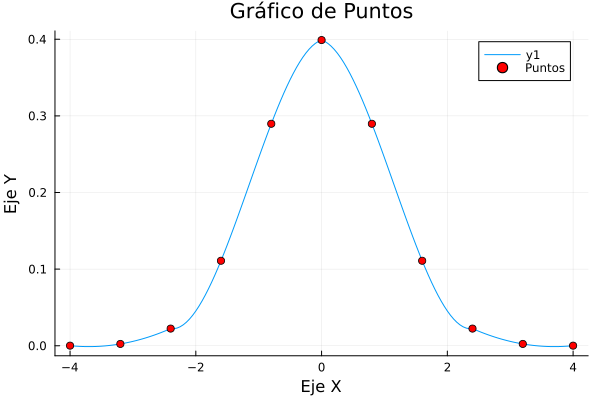

In [34]:
plot_polynomiun(x_sample, y_sample, 0.05)

11


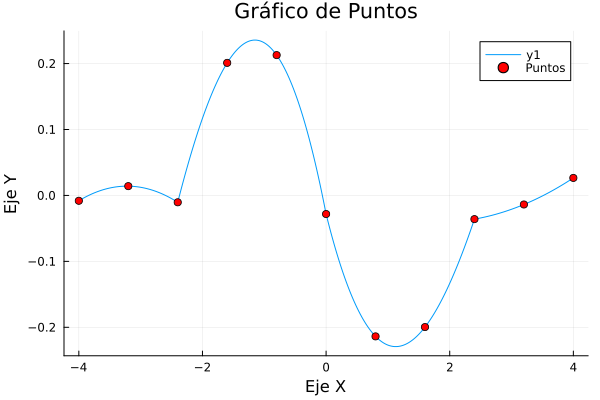

In [37]:
#degree of the derivative
n = 1
h = 0.25
nresample = 11
niters = 5

nth_derivative = get_nth_derivarive_lagrange(sampled_points, richardson, normal_distribution, n, nresample, h, niters)
nth_derivative_x = [nth_derivative[i][1] for i in 1:length(nth_derivative)]
nth_derivative_y = [nth_derivative[i][2] for i in 1:length(nth_derivative)]

plot_polynomiun(nth_derivative_x, nth_derivative_y, 0.025)

Derivamos con richardson y obtenemos los puntos para interpolar con cubic splines

In [18]:
function build_continuity_coefficients(X, points)

    """10 de noviembre a partir de las 8 am.
        Given a matrix full of zeros, and of size (4n, 4n), where n is the number of polynomials to be found
        for the cubic spline, this function fills the upper part of the matrix corresponding to the equations 
        that say that the polynomials must be continuous at the intersections of the intervals.

        Arguments:
            X: Matrix of zeros of size (4n, 4n)
            points: Vector of points [x,y] to be interpolated
    """

    # Check that the matrix is square
    size(X, 1) == size(X, 2) || error("The matrix must be square")

    row = 1
    n_intervals = length(points) - 1

    # Fill the upper part of the matrix
    for i in 1:n_intervals
        
        # Columns to be filled
        cols = (4 * i - 3):(4 * i)
        
        # Points to get the coefficients to fill the columns with
        start_point = points[i]
        end_point = points[i + 1]

        X[row, cols] = [start_point[1]^3, start_point[1]^2, start_point[1], 1]
        X[row+1, cols] = [end_point[1]^3, end_point[1]^2, end_point[1], 1]
        row += 2
    end
    

    return X
end

function build_first_derivative_continuity_coefficients(X, points)

    """
        Given a matrix full of zeros, and of size (4n, 4n), where n is the number of polynomials to be found
        for the cubic spline, this function fills the middle part of the matrix corresponding to the equations 
        that say that the first derivative of the polynomials must be continuous at the intersections of the intervals, 
        this is that the first derivative of the polynomial at the end of an interval must be equal to the first derivative
        of the polynomial at the beginning of the next interval.

        Arguments:
            X: Matrix of zeros of size (4n, 4n)
            points: Vector of points [x,y] to be interpolated
    """

    # Check that the matrix is square
    size(X, 1) == size(X, 2) || error("The matrix must be square")

    n_intervals = length(points) - 1
    row = 2*(n_intervals)+ 1  # 2(n -1) + 1 

    # Fill the first mid part part of the matrix
    for i in 1:n_intervals-1
        
        # Columns to be filled
        col1 = (4 * i - 3):(4 * i)
        col2 = (4 * i + 1):(4 * i + 4)

        # Points to get the coefficients to fill the columns with
        start_point = points[i+1]

        X[row, col1] = [-3*start_point[1]^2, -2*start_point[1], -1, 0]
        X[row, col2] = [ 3*start_point[1]^2,    2*start_point[1],    1, 0]

        row += 1
    end
    
    return X
end

function build_second_derivative_continuity_coefficients(X, points)

    # Check that the matrix is square
    size(X, 1) == size(X, 2) || error("The matrix must be square")

    n_intervals = length(points) - 1
    row = 3*(n_intervals) # 3(n-1) = 3(n) -4 +1

    # Fill the second mid part part of the matrix
    for i in 1:n_intervals-1
        
        # Columns to be filled
        col1 = (4 * i - 3):(4 * i)
        col2 = (4 * i + 1):(4 * i + 4)

        # Points to get the coefficients to fill the columns with
        start_point = points[i+1]

        X[row, col1] = [-6*start_point[1], -2, 0, 0]
        X[row, col2] = [ 6*start_point[1],  2, 0, 0]

        row += 1
    end
    
    return X

end

function build_second_derivative_natural_coefficients(X, points)

    # Check that the matrix is square
    size(X, 1) == size(X, 2) || error("The matrix must be square")

    n_intervals = length(points) - 1
    row = 2*(2*(n_intervals+1)-3) + 1  # 2(2(n)-3) + 1

    # Columns to be filled
    col1 = 1:4
    col2 = (n_intervals*4 - 3):(n_intervals*4)

    # Points to get the coefficients to fill the columns with
    start_point = points[1]
    end_point = points[end]

    # Fill the second mid part part of the matrix
    X[row, col1] = [6*start_point[1], 2, 0, 0]
    X[row+1,col2] = [6*end_point[1], 2, 0, 0]

    return X
end

build_second_derivative_natural_coefficients (generic function with 1 method)

In [19]:
function build_matrix(points)
    n_intervals = length(points) - 1

    #matrix of zeros of size (4n, 4n)
    X = zeros(4 * n_intervals, 4 * n_intervals)

    #fill the upper part of the matrix and print the complete matrix
    X = build_continuity_coefficients(X, points)
    X = build_first_derivative_continuity_coefficients(X, points)
    X = build_second_derivative_continuity_coefficients(X, points)
    X = build_second_derivative_natural_coefficients(X, points)

    return X
end

function build_vector(points)

    n_intervals = length(points) - 1

    #vector of zeros of size (4n, 1)
    Y = zeros(4 * n_intervals, 1)


    #fill the upper part of the matrix and print the complete matrix
    Y[1] = points[1][2]
    Y[2*(n_intervals-1)+2] = points[end][2]

    row = 2
    for i in 2:n_intervals
        Y[row] = points[i][2]
        Y[row+1] = points[i][2]
        row += 2
    end

    return Y

end

build_vector (generic function with 1 method)

In [20]:
function build_and_solve_coefficients(points)
    X = build_matrix(points)
    Y = build_vector(points)
    return X\Y
end

function build_cubic_splines(points, x)

    #sort points by x value 
    points = sort(points, by = x -> x[1])
    
    #build and solve the coefficients
    coefficients = build_and_solve_coefficients(points)
    n_intervals = length(points) - 1
    polynomials = []

    #build the polynomials
    for i in 1:n_intervals
        start_point = points[i]
        end_point = points[i+1]
        polynomial = coefficients[4*i-3]*x^3 + coefficients[4*i-2]*x^2 + coefficients[4*i-1]*x + coefficients[4*i]
        push!(polynomials, (Symbolics.build_function(polynomial, x, expression = false) , start_point[1],end_point[1]))
    end
    return polynomials
end

function interpolate(polynomals, x)
    for polynomial in polynomals
        if x >= polynomial[2] && x <= polynomial[3]
            return polynomial[1](x)
        end
    end
    return nothing
end

interpolate (generic function with 1 method)

In [39]:
function get_nth_derivarive_cubic(sampling_points::Vector{Vector{Float64}},
                                  numeric_diff_algoritm::Function,
                                  fn::Function,
                                  n::Int,
                                  h::Float64, 
                                  nresample::Int, 
                                  niters::Int)
    """
        Given a set of points, this function calculates the nth derivative of the function that interpolates the points.

        Arguments:
        ----------------
            sampling_points: Vector of points [x,y] to interpolate.
            numeric_diff_algoritm: function used to calculate the derivative.
            fn: assistant function to calculate the derivative, some algorithms need an extra function to calculate the derivative.

            n: nth derivative to calculate.
            h: step to calculate the derivative.
        
        Returns:
        ----------------
            y: interpolated value.
    """

    if n < 1
        error("The nth derivative must be greater than 0")
    end

    @variables x_sym
    xmin = minimum([p[1] for p in sampling_points])
    xmax = maximum([p[1] for p in sampling_points])
    
    for i in 1:n
        #given the points try to approximate the function with a cubic spline
        polynomials = build_cubic_splines(sampling_points, x_sym)
        fn = (x) -> interpolate(polynomials, x)
        
        #build the x_domain to sample the points
        x_domain = [x for x in range(start=xmin, stop=xmax, length=nresample)]
        
        #resample the points to get a better approximation using the cubic spline
        #update the sampling_points
        sampling_points = [[x, fn(x)] for x in x_domain]
    
        #calculate the derivative of the points
        derivative::Vector{Vector{Float64}} = []
    
        for j in 1:length(x_domain)

            x = x_domain[j]
            if x + h > xmax
                #computes the derivative of the last points
                last_3_points = sampling_points[j-2:j]
                push!(derivative, [x, three_point_numeric_diff_extremes(last_3_points, h)])
            else
                push!(derivative, [x, numeric_diff_algoritm(fn, x, h, niters)])
            end
        end

        sampling_points = derivative
    end

    return sampling_points, build_cubic_splines(sampling_points, x_sym)
end


get_nth_derivarive_cubic (generic function with 1 method)

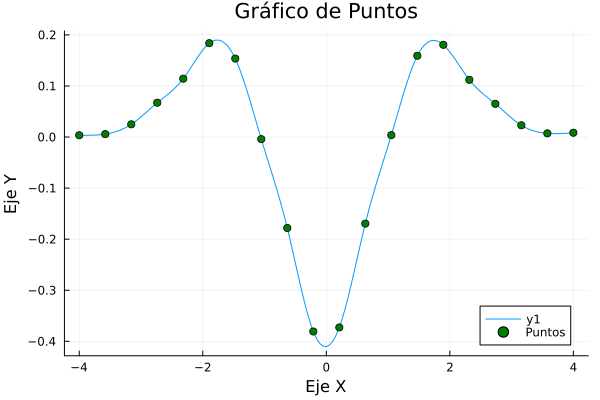

In [40]:
#degree of the derivative
n = 2
h = 0.25
resample = 20
niters = 5

nth_derivative, polynomials = get_nth_derivarive_cubic(sampled_points, richardson, normal_distribution, n, h, resample, niters)
nth_derivative_x = [nth_derivative[i][1] for i in 1:length(nth_derivative)]
nth_derivative_y = [nth_derivative[i][2] for i in 1:length(nth_derivative)]

#used for plotting the interpolation of the points given by the get_nth_derivarive_cubic function
x_domain = [i for i in start:0.05:stop]
y_range  = [interpolate(polynomials, x) for x in x_domain]

plot(x_domain, y_range, legend=true, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")
scatter!(nth_derivative_x, nth_derivative_y, label="Puntos", color=:green)

Ahora buscamos la raíz con el método de splines cúbicos + richadson

In [23]:
fn = (x) -> interpolate(polynomials, x)
low = -2.0
high = 2.0
tol = 0.0001
max_iter = 1000
target_value = 0.0

x1, niters1 = bisection(fn, low, high, tol, max_iter, target_value)

UndefVarError: UndefVarError: `polynomials` not defined

In [24]:
low = 0.0
high = 2.0
tol = 0.0001
max_iter = 1000
target_value = 0.0

x2, niters2 = bisection(fn, low, high, tol, max_iter, target_value)

UndefVarError: UndefVarError: `polynomials` not defined

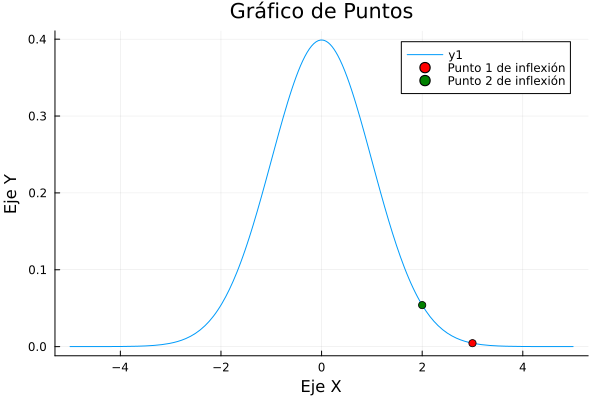

In [25]:
plot(normal_distribution, legend=true, title="Gráfico de Puntos", xlabel="Eje X", ylabel="Eje Y")
scatter!([x1], [normal_distribution(x1)], label="Punto 1 de inflexión", color=:red)
scatter!([x2], [normal_distribution(x2)], label="Punto 2 de inflexión", color=:green)

---